In [3]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # Linear algebra library
import pandas as pd

Use pandas to read the dataset.

In [4]:
! pwd
data = pd.read_csv("../results/unconstrained_no_bounds.csv")
data


/home/gaoyuc10/OptimizationParameterTuning/Julia Notebook/src


,nvar,variable_nvar,ncon,variable_ncon,minimize,name,has_equalities_only,has_inequalities_only,has_bounds,has_fixed_variables,objtype,contype,best_known_lower_bound,best_known_upper_bound,is_feasible,defined_everywhere,origin
0,1,False,0,False,True,AMPGO02,False,False,False,False,other,unconstrained,-inf,8.394984e-01,True,NaN,unknown
1,1,False,0,False,True,AMPGO03,False,False,False,False,other,unconstrained,-inf,2.889608e+00,True,NaN,unknown
2,1,False,0,False,True,AMPGO04,False,False,False,False,other,unconstrained,-inf,-2.566598e+00,True,NaN,unknown
3,1,False,0,False,True,AMPGO05,False,False,False,False,other,unconstrained,-inf,-0.000000e+00,True,NaN,unknown
4,1,False,0,False,True,AMPGO06,False,False,False,False,other,unconstrained,-inf,3.517696e-43,True,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,100,True,0,False,True,tridia,False,False,False,False,other,unconstrained,-inf,5.049000e+03,True,NaN,unknown
176,100,True,0,False,True,vardim,False,False,False,False,other,unconstrained,-inf,1.310584e+14,True,NaN,unknown
177,8,False,0,False,True,vibrbeam,False,False,False,False,least_squares,unconstrained,-inf,8.231275e+03,True,NaN,unknown
178,31,False,0,False,True,watson,False,False,False,False,least_squares,unconstrained,-inf,5.000000e+02,True,NaN,unknown


Let's start by exploring the data that we have in hand. Pandas has a nice function to summarize the mean and dispersion of each feature in our data frame:

In [5]:
data.describe()

/home/gaoyuc10/.venvs/optune/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/gaoyuc10/.venvs/optune/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,nvar,ncon,best_known_lower_bound,best_known_upper_bound
count,180.000000,180.0,180.0000,1.800000e+02
mean,46.394444,0.0,-inf,1.469092e+12
std,47.928543,0.0,NaN,1.194981e+13
min,1.000000,0.0,-inf,-1.890678e+02
25%,3.000000,0.0,NaN,1.987436e-02
50%,8.000000,0.0,NaN,5.000000e+02
75%,100.000000,0.0,NaN,4.921335e+03
max,100.000000,0.0,0.7966,1.310584e+14


{'whiskers': [<matplotlib.lines.Line2D at 0x78e3879b7cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x78e3879e8290>,
 'boxes': [<matplotlib.lines.Line2D at 0x78e3879b79b0>],
 'medians': [<matplotlib.lines.Line2D at 0x78e3879e88f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78e3879e8bf0>],
 'means': []}

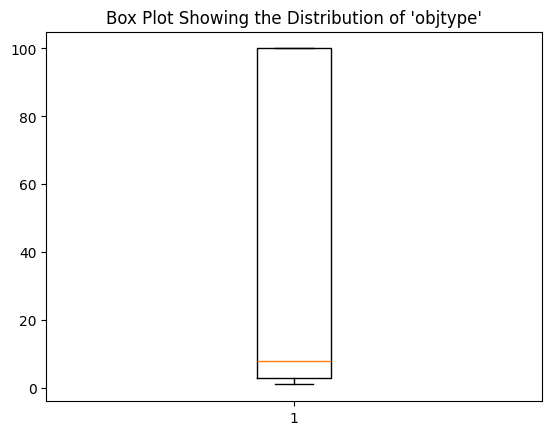

In [6]:
plt.title("Box Plot Showing the Distribution of 'objtype'")
plt.boxplot(data["nvar"])

In [7]:
data["nvar"].value_counts().sort_index()

nvar
1      28
2      15
3      19
4      13
5       3
6       5
7       3
8      11
9       1
11      1
31      1
91      1
99     12
100    67
Name: count, dtype: int64

In [8]:
pd.crosstab(data["objtype"], data["has_equalities_only"])

has_equalities_only,False
objtype,
least_squares,67
other,113


In [9]:
pd.crosstab(data["objtype"], data["origin"])

origin,academic,real,unknown
objtype,,,
least_squares,1,2,64
other,0,0,113


In [10]:
pd.crosstab(data["objtype"], data["has_inequalities_only"])

has_inequalities_only,False
objtype,
least_squares,67
other,113


In [11]:
pd.crosstab(data["objtype"], data["defined_everywhere"])

defined_everywhere,False
objtype,
least_squares,3


In [12]:
pd.crosstab(data["objtype"], data["has_fixed_variables"])

has_fixed_variables,False
objtype,
least_squares,67
other,113


In [13]:
pd.crosstab(data["objtype"], data["variable_ncon"])

variable_ncon,False
objtype,
least_squares,67
other,113


In [14]:
pd.crosstab(data["objtype"], data["nvar"])

nvar,1,2,3,4,5,6,7,8,9,11,31,91,99,100
objtype,,,,,,,,,,,,,,
least_squares,0,9,11,6,3,4,3,11,1,1,1,1,0,16
other,28,6,8,7,0,1,0,0,0,0,0,0,12,51


In [15]:
pd.crosstab(data["objtype"], data["is_feasible"])

is_feasible,True
objtype,
least_squares,67
other,113


In [16]:
pd.crosstab(data["objtype"], data["minimize"])

minimize,True
objtype,
least_squares,67
other,113


In [17]:
pd.crosstab(data["objtype"], data["ncon"])

ncon,0
objtype,
least_squares,67
other,113


In [18]:
pd.crosstab(data["objtype"], data["best_known_lower_bound"])

best_known_lower_bound,-inf,-1.587401,0.000000,0.796600
objtype,,,,
least_squares,67,0,0,0
other,100,1,11,1


In [19]:
pd.crosstab(data["objtype"], data["best_known_upper_bound"])

best_known_upper_bound,-1.890678e+02,-1.080000e+02,-8.330563e+01,-3.156208e+00,-2.566598e+00,-2.092800e+00,-1.587401e+00,-1.256666e+00,-1.008422e+00,-1.000000e+00,...,2.872665e+07,1.006391e+08,3.452950e+08,4.851652e+08,1.693608e+09,1.854274e+09,9.999980e+11,6.385444e+13,6.851736e+13,1.310584e+14
objtype,,,,,,,,,,,,,,,,,,,,,
least_squares,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
other,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,0,2,0,1,0,1


In [62]:
y = data["objtype"]

data_fets = data.drop(columns=["objtype"])

data_fets = pd.get_dummies(data_fets, drop_first=False)

feature_names = list(data_fets.columns)

In [64]:
from sklearn.model_selection import train_test_split

# Split the data into X (dependent variables) and t (response variable)
X = data_fets
X = np.nan_to_num(X.replace([np.inf, -np.inf], np.nan), nan=0.0, posinf=1e9, neginf=-1e9)
t = np.array(y)

# First, we will use `train_test_split` to split the data set into
# 6500 training+validation, and 1500 test:
X_tv, X_test, t_tv, t_test = train_test_split(X, t, test_size=30/180, random_state=1)

# Then, use `train_test_split` to split the training+validation data
# into 5000 train and 1500 validation
X_train, X_valid, t_train, t_valid = train_test_split(X_tv, t_tv, test_size=30/90, random_state=1)

In [65]:
from sklearn.tree import DecisionTreeClassifier

# imports to visualize tree
from sklearn import tree as treeViz
import graphviz
import pydotplus
from IPython.display import display

In [66]:
def visualize_tree(model, max_depth=5):
    """
    Generate and return an image representing an Sklearn decision tree.

    Each node in the visualization represents a node in the decision tree.
    In addition, visualization for each node contains:
        - The feature that is split on
        - The entropy (of the outputs `t`) at the node
        - The number of training samples at the node
        - The number of training samples with true/false values
        - The majority class (heart disease or not)
    The colour of the node also shows the majority class and purity

    See here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

    Parameters:
        `model` - An Sklearn decision tree model
        `max_depth` - Max depth of decision tree to be rendered in the notebook.
         This is useful since the tree can get very large if the max_depth is
         set too high and thus making the resulting figure difficult to interpret.
    """
    dot_data = treeViz.export_graphviz(model,
                                       feature_names=feature_names,
                                       max_depth=max_depth,
                                       class_names=["least_squares", "other"],
                                       filled=True,
                                       rounded=True)
    return display(graphviz.Source(dot_data))

In [67]:
# Creating a DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

tree.fit(X_train, t_train)

# Print the training and validation scores (accuracy)
print("Training Accuracy:", tree.score(X_train, t_train))
print("Validation Accuracy:", tree.score(X_valid, t_valid))

Training Accuracy: 0.89
Validation Accuracy: 0.86


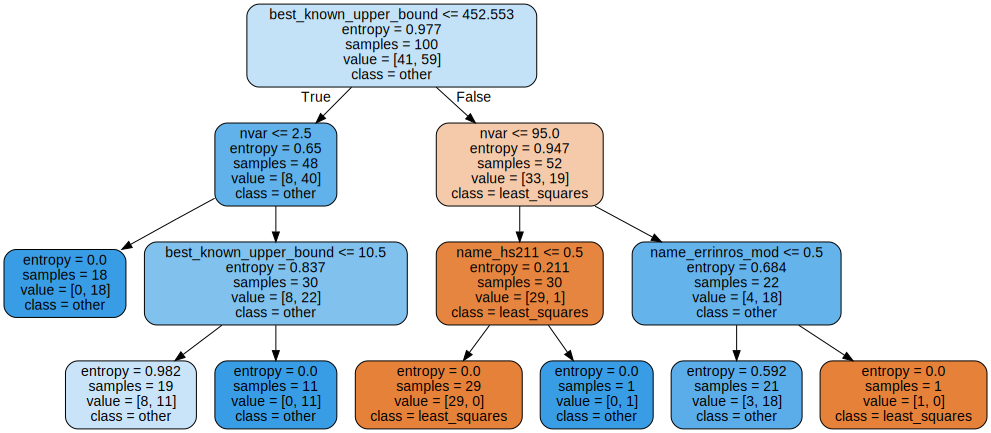

In [68]:
visualize_tree(tree, max_depth=3)

Hyperparameter Tuning for model parameters

In [69]:
def build_all_models(max_depths,
                     min_samples_split,
                     criterion,
                     X_train=X_train,
                     t_train=t_train,
                     X_valid=X_valid,
                     t_valid=t_valid):
    """
    Parameters:
        `max_depths` - A list of values representing the max_depth values to be
                       try as hyperparameter values
        `min_samples_split` - An list of values representing the min_samples_split
                       values to try as hyperpareameter values
        `criterion` -  A string; either "entropy" or "gini"

    Returns a dictionary, `out`, whose keys are the the hyperparameter choices, and whose values are
    the training and validation accuracies (via the `score()` method).
    In other words, out[(max_depth, min_samples_split)]['val'] = validation score and
                    out[(max_depth, min_samples_split)]['train'] = training score
    For that combination of (max_depth, min_samples_split) hyperparameters.
    """
    out = {}

    for d in max_depths:
        for s in min_samples_split:
            out[(d, s)] = {}
            # Create a DecisionTreeClassifier based on the given hyperparameters and fit it to the data
            tree = DecisionTreeClassifier(criterion=criterion, max_depth=d, min_samples_split=s)
            tree.fit(X_train, t_train)
            # TODO: store the validation and training scores in the `out` dictionary
            out[(d, s)]['val'] = tree.score(X_valid, t_valid)
            out[(d, s)]['train'] = tree.score(X_train, t_train)
    return out

In [72]:
# Hyperparameters values to try in our grid search
criterions = ["entropy", "gini"]
max_depths = [1, 5, 10, 15, 20, 25, 30, 50, 100]
min_samples_split = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

for criterion in criterions:
    print("\nUsing criterion {}".format(criterion))
    res = build_all_models(max_depths, min_samples_split, criterion)

    # TODO: complete this loop which should search for the optimal
    #  (max_depth, min_samples_split) given this criterion
    best_d, best_s = None, None
    best_accuracy = 0
    for d, s in res:
        if res[(d,s)]['val'] > best_accuracy:
          best_accuracy = res[(d,s)]['val']
          best_d, best_s = d, s
    print(f"The best parameters for criterion=\"{criterion}\" is max_depth={best_d} and min_samples_split={best_s} with accuracy={best_accuracy}.\n")


Using criterion entropy
The best parameters for criterion="entropy" is max_depth=5 and min_samples_split=2 with accuracy=0.86.


Using criterion gini
The best parameters for criterion="gini" is max_depth=5 and min_samples_split=2 with accuracy=0.86.



In [75]:
best_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2)
best_tree.fit(X_train, t_train)
print("Test Accuracy:", best_tree.score(X_test, t_test))

Test Accuracy: 0.8666666666666667
